In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_excel('Results240719.xlsx', sheet_name='Sheet1')

In [3]:
# Selecting the relevant columns for histogram plotting
columns_to_plot = ['Basein', 'Baseout', 'Saain', 'Saaout', 'Detin', 'Detout']

In [4]:
df_cleaned = df.copy()
for col in df_cleaned.columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Verifying the conversion
df_cleaned['Detout'].dtype

dtype('float64')

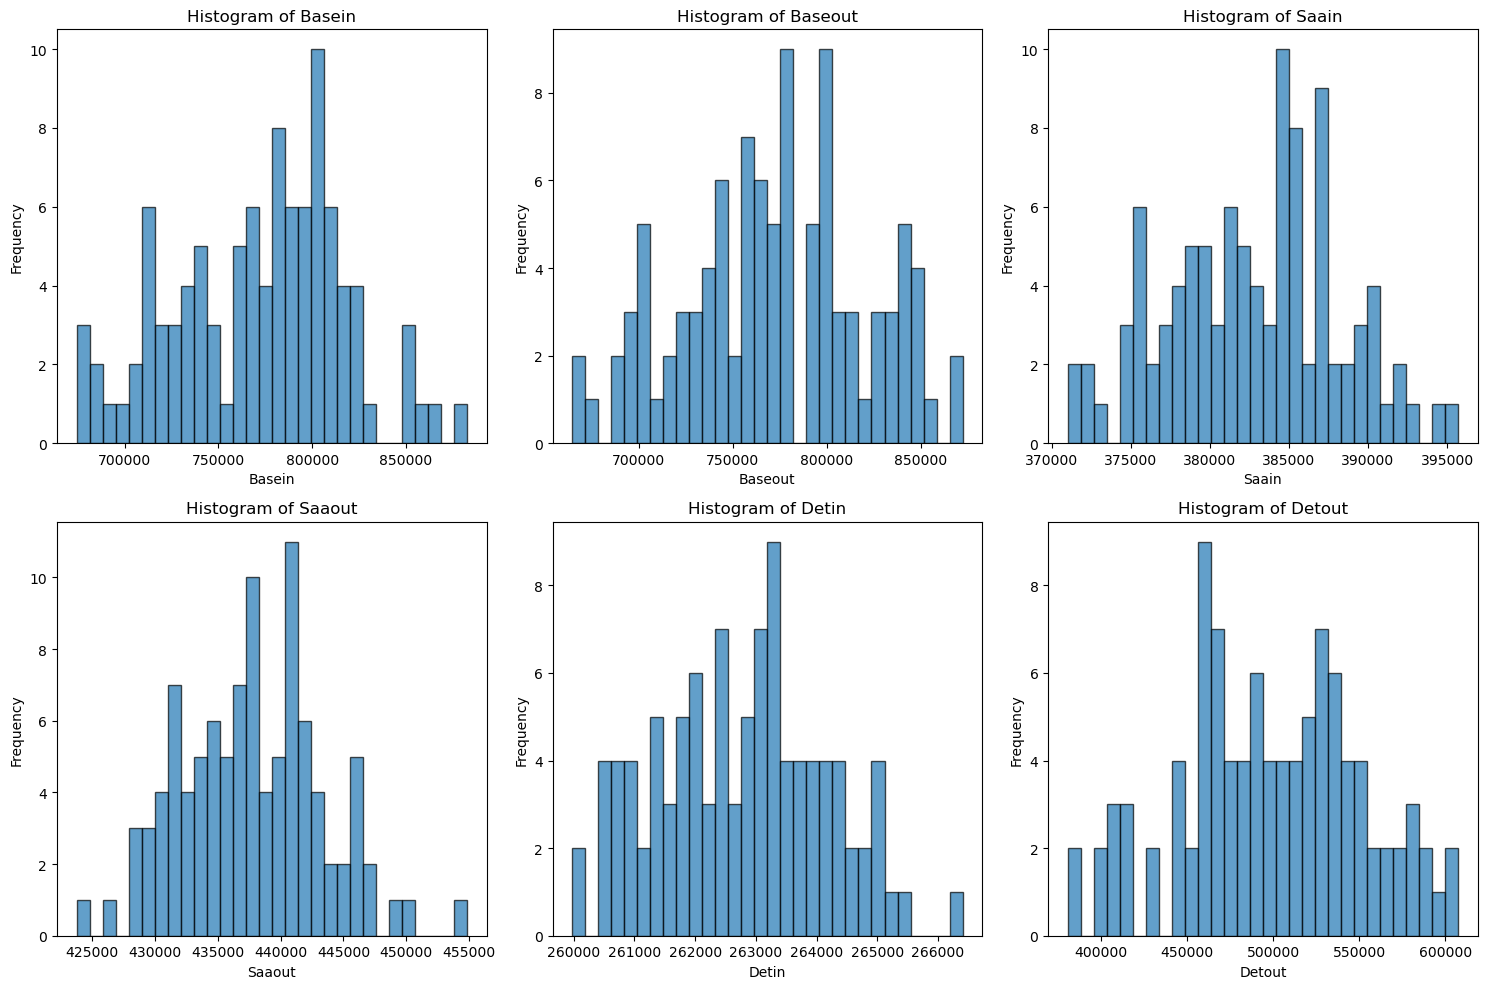

In [5]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_cleaned[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

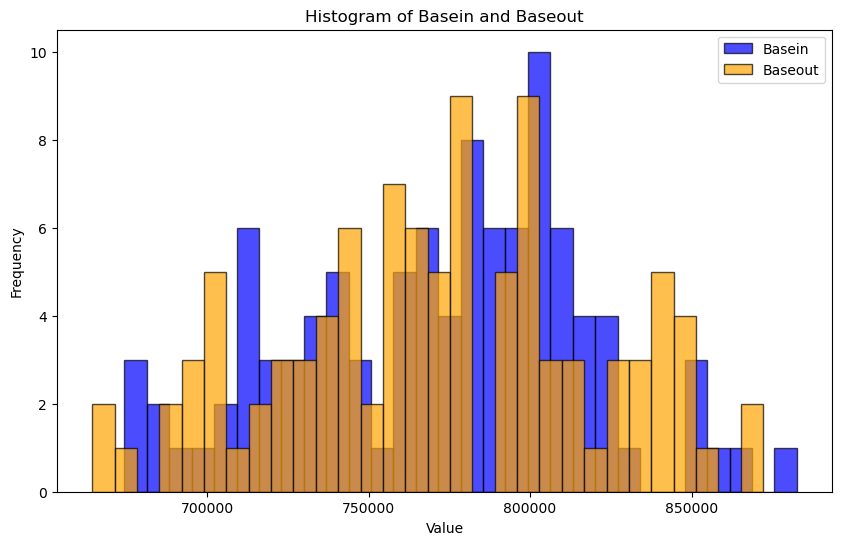

In [6]:
# Plotting histograms for 'Basein' and 'Baseout' in the same figure with contrasting colors
plt.figure(figsize=(10, 6))

plt.hist(df_cleaned['Basein'].dropna(), bins=30, edgecolor='k', alpha=0.7, color='blue', label='Basein')
plt.hist(df_cleaned['Baseout'].dropna(), bins=30, edgecolor='k', alpha=0.7, color='orange', label='Baseout')

plt.title('Histogram of Basein and Baseout')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("base.png")
plt.show()

In [7]:
def plot_pairwise(strategy1, strategy2):
    plt.figure(figsize=(10, 6))

    plt.hist(df_cleaned[strategy1].dropna(), bins=30, edgecolor='k', alpha=0.7, color='blue', label= f'{strategy1}')
    plt.hist(df_cleaned[strategy2].dropna(), bins=30, edgecolor='k', alpha=0.7, color='orange', label=f'{strategy2}')

    plt.title(f'Histogram of {strategy1} and {strategy2}')
    plt.xlabel('Cost', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
       
    # Set the font size for tick labels
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Set the legend with increased font size
    plt.legend(fontsize=14)
    
    filename = f"{strategy1}.png"

# Save the figure to a file with the dynamic filename
    plt.savefig(filename)
    plt.show()

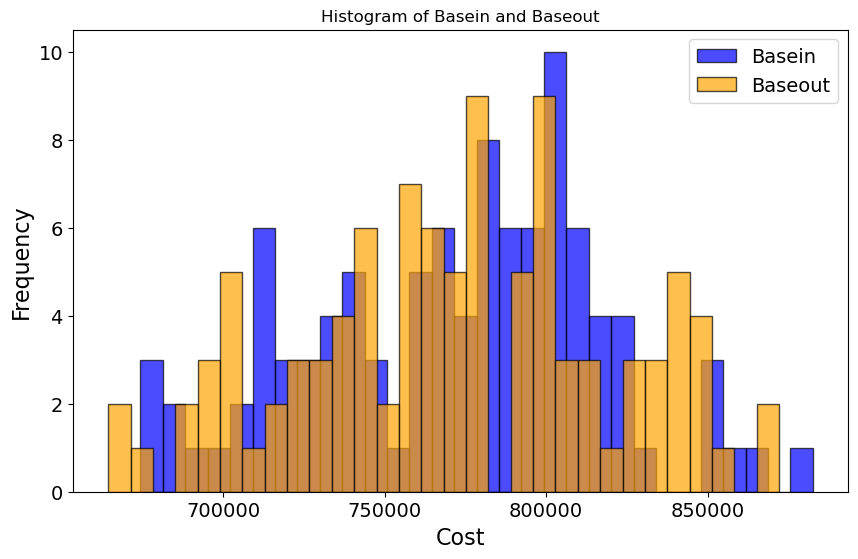

In [8]:
plot_pairwise('Basein', 'Baseout')

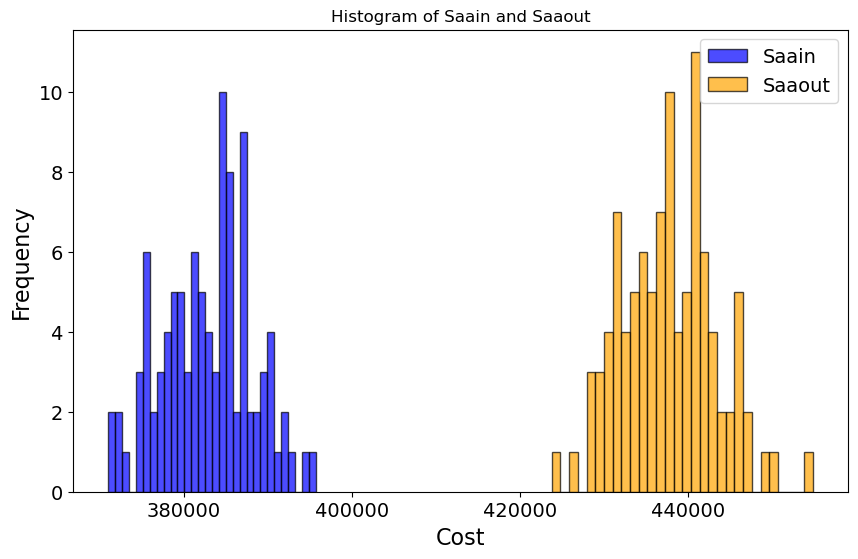

In [9]:
plot_pairwise('Saain', 'Saaout')

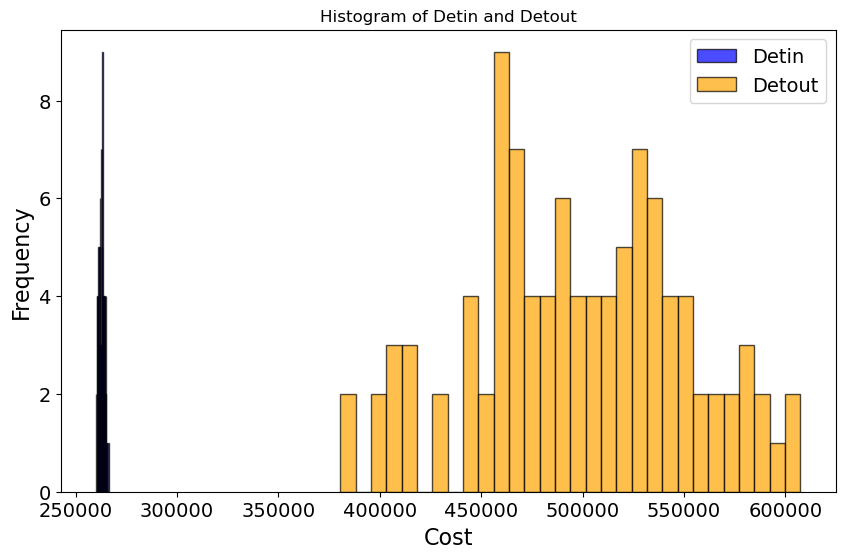

In [10]:
plot_pairwise('Detin', 'Detout')

In [11]:
df_int= pd.DataFrame()

for col in columns_to_plot:
    df_int[col]= df_cleaned[col].dropna().reset_index(drop=True)

In [12]:
df_int.head()

,Basein,Baseout,Saain,Saaout,Detin,Detout
0,713833.312500,761335.812500,390423.825,432153.671137,261645.0,407749.038401
1,784800.281250,799082.781250,372239.450,436651.008373,261260.0,467491.899762
2,833089.843750,777404.243750,384348.500,446931.909204,262868.0,607448.405210
3,798526.614583,799194.114583,383664.400,423773.169317,263559.0,492308.126219
4,809961.812500,821170.062500,386739.250,445950.415885,261903.0,475631.124427


In [13]:
def compute_statistics(df, columns):
    """
    Computes the mean, standard deviation, 75th percentile, 95th percentile, 
    and coefficient of variance for specified columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of columns to compute statistics for.

    Returns:
    pd.DataFrame: A DataFrame containing the computed statistics for each column.
    """
    statistics = {
        'Mean': [],
        'Standard Deviation': [],
        '75th Percentile': [],
        '95th Percentile': [],
        'Coefficient of Variance': []
    }

    for column in columns:
        col_data = df[column].dropna()
        mean = col_data.mean()
        std_dev = col_data.std()
        p75 = col_data.quantile(0.75)
        p95 = col_data.quantile(0.95)
        cov = 100*std_dev / mean if mean != 0 else float('inf')
        
        statistics['Mean'].append(mean)
        statistics['Standard Deviation'].append(std_dev)
        statistics['75th Percentile'].append(p75)
        statistics['95th Percentile'].append(p95)
        statistics['Coefficient of Variance'].append(cov)

    return pd.DataFrame(statistics, index=columns)

# Example usage with the cleaned DataFrame and specified columns
columns_to_analyze = ['Basein', 'Baseout', 'Saain', 'Saaout', 'Detin', 'Detout']
stats_df = compute_statistics(df_int, columns_to_analyze)


In [14]:
stats_df

,Mean,Standard Deviation,75th Percentile,95th Percentile,Coefficient of Variance
Basein,771878.599479,45696.065375,804103.658854,851082.100000,5.920110
Baseout,771873.682229,48687.652434,802315.023958,848452.073437,6.307723
Saain,382723.689500,5444.316016,386746.775000,390930.365000,1.422519
Saaout,437729.540472,5618.797678,441202.474634,446386.043130,1.283623
Detin,262758.240000,1384.228492,263751.750000,264976.180000,0.526807
Detout,497939.676458,52913.169170,534584.496384,584610.505210,10.626422


In [15]:
stats_df.to_csv('stats_df.csv')

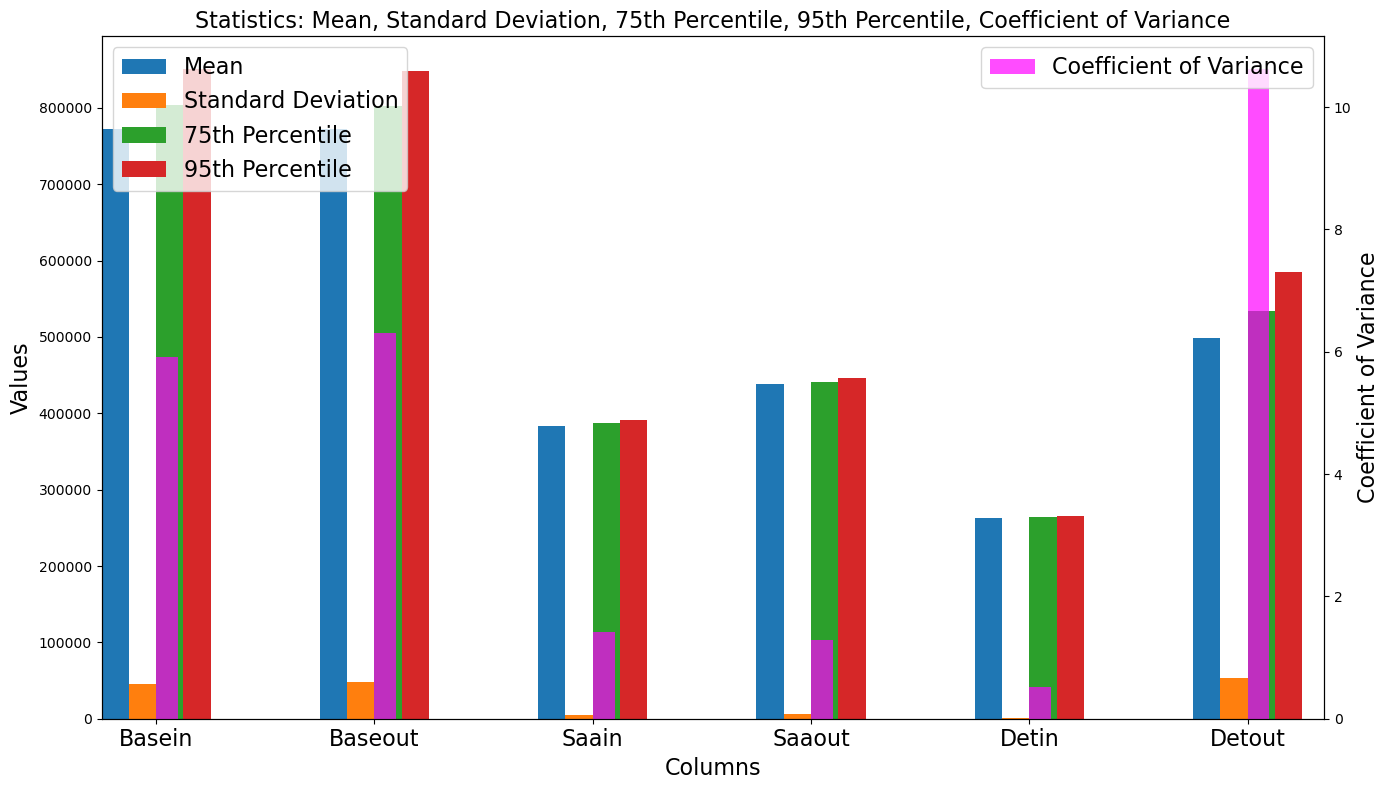

In [36]:
# Plotting the bar chart with coefficient of variance on a secondary axis as a bar plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting the mean, standard deviation, 75th percentile, and 95th percentile
stats_df[['Mean', 'Standard Deviation', '75th Percentile', '95th Percentile']].plot(kind='bar', ax=ax1)
ax1.set_xlabel('Columns', fontsize=16)
ax1.set_ylabel('Values', fontsize=16)
ax1.set_title('Statistics: Mean, Standard Deviation, 75th Percentile, 95th Percentile, Coefficient of Variance', fontsize=16)
ax1.legend(loc='upper left', fontsize=16)

# Increase the font size of the x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=16, rotation=0)

# Creating a secondary axis for coefficient of variance
ax2 = ax1.twinx()
stats_df['Coefficient of Variance'].plot(kind='bar', color='magenta', ax=ax2, alpha=0.7, width=0.1, position= 0)
ax2.set_ylabel('Coefficient of Variance', fontsize=16)
ax2.legend(['Coefficient of Variance'], loc='upper right', fontsize=16)

plt.tight_layout()
plt.savefig("summary.png")
plt.show()


In [19]:
df_int.columns

Index(['Basein', 'Baseout', 'Saain', 'Saaout', 'Detin', 'Detout'], dtype='object')

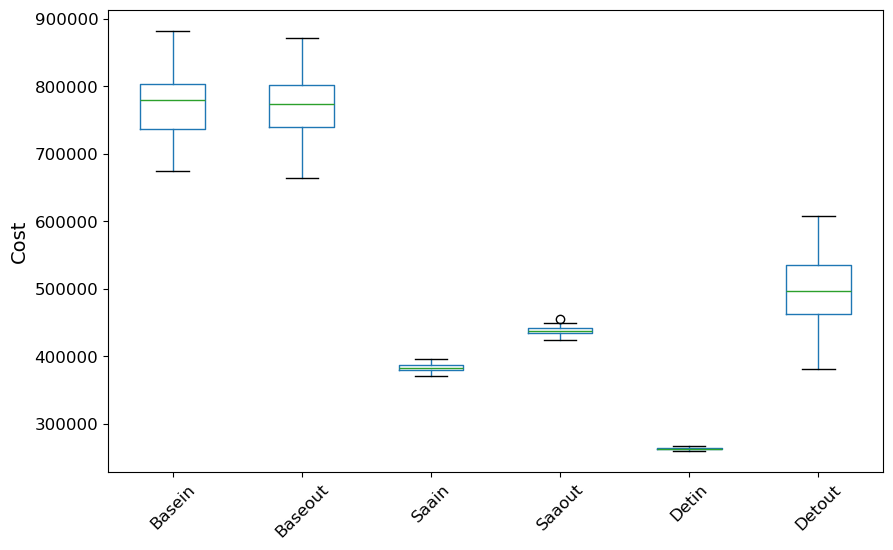

In [40]:
# Create the box plot
plt.figure(figsize=(10, 6))
df_int.boxplot(grid=False)

# Setting the title and labels with increased font size
# plt.title('', fontsize=16)
plt.ylabel('Cost', fontsize=14)
# plt.xlabel('Columns', fontsize=14)

# Setting the font size for tick labels
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.show()